# Exact Solver

We developed three MIPs and two CPs to solve instances of MSC to optimality.
Here we analyze, how well they were able to solve the three objectives to optimality.
We use the number of edges as measure as they are the primary factor for the size of the formulations.
Actually, the number of vertices is also an important factor but not half as important as the number of edges and three dimensional plots are rather difficult to read.

Plotting this data is not easy:
* We are actually interested in the time it takes to solve an instance to optimality with a given solver.
* However, the runtime grows exponentially and varies strongly. Some instance with n=10 might be solved in 30 seconds, while another needs 3 days.
* We do not have the time to solve all instances to optimality. We can give all instances maybe a 15 min limit.
* Now we have a problem: If we clip the runtime at 15 min, it distorts the results (we cannot differ an if there has been two instances solved to optimality in 10 min or one instance that was solved to optimality in 5 min and one that couldn't be solved in time). Of course, we now that the closer the aggregated values get to the timelimit, the harder it was, but in my experience, the corresponding plots are most of the time useless.
* If we only consider solved instances, the data gets skewed because we only consider simple instances.
* Alternative: We only consider the percantage of instances, that could be solved to optimality within the time limit. This does not really give us the originally indendet information, but it is not distorted and due to the exponential nature of the underlying problems, this actually gives use often usefull information. If you want, you could do these plots for multiple timeouts (do  not run the experiments again but simply mark all solutions with a longer runtime as aborted).

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

In [19]:
sns.set_theme() # we use seaborn for beautiful and simple plots

# Configuration

In [20]:
# To quickly change the scaling of the plots
scaling = 0.9

In [21]:
# Selecting the solver to compare
solver_to_compare = {
    'MS': [ 
            'CP-1 (MS)',
            'MIP-1 (MS)',
            'MIP-2 (MS)'
          ],
    'TE': [ 
            'CP-2 (TE)',
            'MIP-1 (TE)',
            'MIP-3 (TE)'
          ],
    'BE': [
            'CP-2 (BE)',
            'MIP-1 (BE)',
            'MIP-3 (BE)'
          ]
}

# Load the experimental data

In [22]:
instances = pd.read_json("./data/instances.json")
instances.sample(5)

,graph_id,vertices_amount,edges_amount,instance_type,instance
1797,1798,19,171,random,See sqllite database using graph_id
312,313,13,31,celestial,See sqllite database using graph_id
534,535,19,133,celestial,See sqllite database using graph_id
870,871,27,158,celestial,See sqllite database using graph_id
1559,1560,43,269,random,See sqllite database using graph_id


In [23]:
solutions = pd.read_json("./data/solutions.json")
solutions=solutions[solutions["solver_type"].isin(["CP-1", "CP-2", "MIP-1", "MIP-2", "MIP-3"])]
solutions.sample(10)

,graph_id,solution_id,MS,TE,BE,solver_type,solver,solution_type,date,runtime,has_optimality_certificate,solution
9847,460,13059,919.807094,6761.945742,739.341682,CP-2,CP-2 (BE),BE,2020-08-13 12:34:32.993242,900.047584,False,See sqlite database using solution_id
23503,1158,28167,398.336400,3768.290699,383.369092,CP-1,CP-1 (MS),MS,2020-12-31 11:08:30.196997,0.168330,True,See sqlite database using solution_id
30088,1597,44751,474.438256,13518.923997,452.960872,CP-1,CP-1 (MS),MS,2021-01-02 18:20:34.966595,217.035839,True,See sqlite database using solution_id
31073,1664,42363,249.104727,640.719983,222.672908,MIP-1,MIP-1 (MS),MS,2021-01-08 18:19:28.653270,0.139570,True,See sqlite database using solution_id
14404,700,8869,543.852873,9685.305000,530.222346,CP-1,CP-1 (MS),MS,2020-08-13 12:34:18.111074,1501.724652,False,See sqlite database using solution_id
14195,689,8858,547.285750,10051.413756,520.721238,CP-1,CP-1 (MS),MS,2020-08-13 12:34:18.111074,1501.375980,False,See sqlite database using solution_id
8517,390,12989,1316.250406,2483.408367,188.551781,CP-2,CP-2 (BE),BE,2020-08-13 12:34:32.993242,55.941719,True,See sqlite database using solution_id
19861,980,17339,545.373906,1637.373899,207.381989,MIP-1,MIP-1 (BE),BE,2020-08-25 00:29:19.251040,0.481249,True,See sqlite database using solution_id
22041,1072,27431,476.584517,8096.068108,463.409390,CP-1,CP-1 (MS),MS,2020-12-21 15:09:00.296055,432.874417,True,See sqlite database using solution_id
14483,704,13303,1242.454729,8893.969858,570.682858,CP-2,CP-2 (BE),BE,2020-08-13 12:34:32.993242,900.047110,False,See sqlite database using solution_id


In [24]:
results = solutions.merge(instances, left_on="graph_id", right_on="graph_id")[["graph_id", "instance_type", "solver", "solution_id", "edges_amount", "has_optimality_certificate", "runtime"]]
# There have been some experiments with a too long timemout. We set all solutions that take longer than the timelimit to not-optimal and reduce the runtime to 900.
results.loc[results["runtime"]>900, "has_optimality_certificate"] = False
results.loc[results["runtime"]>900, "runtime"]=900
results

,graph_id,instance_type,solver,solution_id,edges_amount,has_optimality_certificate,runtime
0,1,celestial,MIP-3 (TE),961,15,True,1.232179
1,1,celestial,CP-2 (TE),1281,15,True,1.667908
2,1,celestial,MIP-1 (TE),1475,15,True,1.203949
3,1,celestial,MIP-3 (BE),1770,15,True,0.087314
4,1,celestial,MIP-1 (BE),1930,15,True,0.137630
...,...,...,...,...,...,...,...
6493,2124,celestial,CP-1 (MS),46807,626,False,900.000000
6494,2125,celestial,CP-1 (MS),46808,658,False,900.000000
6495,2132,celestial,CP-1 (MS),46815,764,False,900.000000
6496,2133,celestial,CP-1 (MS),46816,654,False,900.000000


## Largest tested instances for each solver
We will fill them up with aborted entries

In [25]:
# Not all solver has been run for all sizes because they didn't have a chance and we no resources to spare.
results.groupby(["solver", "instance_type"])["edges_amount"].max()

solver      instance_type
CP-1 (MS)   celestial        779
            random           788
CP-2 (BE)   celestial        367
            random            91
CP-2 (TE)   celestial         36
            random           136
MIP-1 (BE)  celestial         36
            random           171
MIP-1 (MS)  celestial        367
            random           200
MIP-1 (TE)  celestial         36
            random           171
MIP-2 (MS)  celestial        102
            random            91
MIP-3 (BE)  celestial         36
            random            91
MIP-3 (TE)  celestial         36
            random            91
Name: edges_amount, dtype: int64

In [26]:
for index, max_size in results.groupby(["solver", "instance_type"])["edges_amount"].max().items():
    larger_instances = instances[(instances["instance_type"]==index[1])&(instances["edges_amount"]>max_size)].copy()
    larger_instances["solver"]=index[0]
    larger_instances["has_optimality_certificate"]=False
    larger_instances["runtime"]=900.0
    results = results.append(larger_instances, ignore_index=True)

# The following plot gives us some insights on runtime and optimality at the same time.
We use different symbols for optimal and non-optimal solutions.
By using different sizes and alpha, we can also see overlapping points.

**However, such distributions can be highly missleading and difficult to read. They are only good for a first impression. Here we also see, that there is a quick change from fast to aborted. Thus, it is much more important to identify this point than the actual runtime.**

(It is also difficult to show results for different kinds of instances within the same plot because scatterplots are already very dense)

In [27]:
t = results[results["solver"].isin(solver_to_compare["MS"])]
plt.figure(figsize=(15,8))
sns.scatterplot(data=t, x="edges_amount", y="runtime", hue="solver",size="solver", style="has_optimality_certificate",markers=["X", "o"],alpha=0.5)

<AxesSubplot:xlabel='edges_amount', ylabel='runtime'>

RuntimeError: latex was not able to process the following string:
b'edges_amount'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/krupke/.matplotlib/tex.cache/37382d103f193804c62123274ab38fbb.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-01-09> xparse <2020-03-03>
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2020/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/local/texlive/2020/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/local/texlive/2020/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2020/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2020/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/local/texlive/2020/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./37382d103f193804c62123274ab38fbb.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/ot1phv.fd)
! Missing $ inserted.
<inserted text> 
                $
l.19 {\sffamily edges_
                      amount}
No pages of output.
Transcript written on 37382d103f193804c62123274ab38fbb.log.




<Figure size 1080x576 with 1 Axes>

# Aggregation: +-x% rolling window

We cannot compute values for every size.
However, in order to compute some partly stable averages, standard deviations, etc., we need multiple entries.
Here, we provide some functionality to simply aggregate the results over some +- percentage.
Unfortunately, I didn't find a native function for that.

In [28]:
def _get_rolled_data(data, on, relative_pm_deviation, step_size=1, name_of_rolled_index="x" ,min_size=1):
    min_x = int(data[on].min())
    max_x = int(data[on].max())
    tables = []
    for x in range(min_x, max_x+step_size, step_size):
        t = data[data[on].apply(lambda x_: math.floor((1-relative_pm_deviation)*x) <= x_ <= math.ceil((1+relative_pm_deviation)*x))].copy()
        t[name_of_rolled_index]=x
        if len(t)>=min_size:
            tables.append(t)
    t = pd.concat(tables)
    return t

# Plotting


We plot the plots side by side so only the first plot gets y-labels to save space.
For this, we of course had to fix the y-range.

![aligned plots](static/aligned_exact.png)

In [29]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Helvetica"]})

In [30]:
def plot(data, filename=None, framealpha=None, width=None, no_y_labels=False):
    t = data
    t.fillna(0.0, inplace=True)
    if width:
        plt.figure(figsize=(scaling*width, scaling*5*(5/6)))
    else:
        plt.figure(figsize=(scaling*5,scaling*5))
    sns.lineplot(data=t, x="x", y="solved", hue="Solver", style="Type")
    ax = plt.gca()
    ax.set_xlim(-1,None)

    
    #plt.yticks(rotation=90)
    
    #plt.title(f"{obj_print_names[obj]}")
    plt.ylabel("Instances solved to optimality")
    plt.xlabel("Number of edges $+/-5\%$")
    
    vals = ax.get_yticks()
    ax.set_yticks(vals)
    ax.set_yticklabels([f"{int(x)}\%" for x in vals])
    if no_y_labels:
        ax.get_yaxis().set_ticklabels([])
        plt.ylabel(None)
    ax.set_ylim(-3, 103)

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    if framealpha:
        plt.legend(loc='upper right', framealpha=framealpha)
    else:
        plt.legend(loc='upper right')
    if filename:
        for ext in ["pdf", "png"]:
            plt.savefig(f"./output/{filename}.{ext}", dpi=300)
    plt.show()
    #sns.lineplot(data=t, x="edges", y="count", hue="solver", style="graph")
    #plt.show()
    #sns.countplot(data=results[results["solution_type"]==obj], x="edge_group", hue="solver")
    #plt.show()

In [31]:
def get_data(obj):
    data = []
    # Aggregate for every instance_type, solver combination
    for instance_type in ["random", "celestial"]:
        for solver in solver_to_compare[obj]:
            t = results[(results["solver"]==solver) & (results["instance_type"]==instance_type)]
            t = _get_rolled_data(t, on="edges_amount", relative_pm_deviation=0.05, step_size=1, name_of_rolled_index="x" ,min_size=1)
            t["solved"]=t["has_optimality_certificate"].apply(lambda x: 100.0 if x else 0)
            t = t.groupby(["x"])[["solved"]].mean()
            t = t.reset_index()
            t["solver"]=solver
            t["instance_type"]=instance_type
            data.append(t)
    data = pd.concat(data)
    data.rename(columns={"solver": "Solver", "instance_type": "Type"}, inplace=True)
    data.sort_values(["x", "Solver"], inplace=True, kind='mergesort')
    data.sort_values(["Type"], inplace=True, ascending=False,kind='mergesort')
    return data[["x", "Solver", "Type", "solved"]]

## Makespan

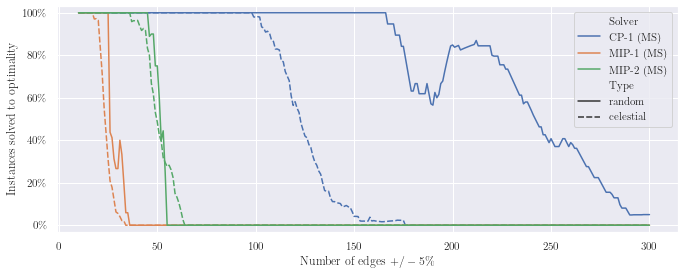

In [32]:
data = get_data("MS")
data = data[data["x"].apply(lambda x: 10<=x<= 300)]
plot(data, width=10.5, filename="plot_exact_percent_makespan_scaled")

## Total Energy

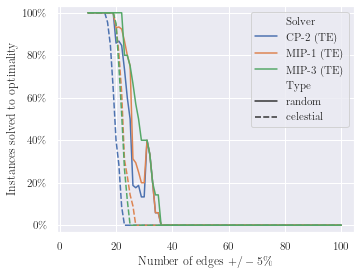

In [33]:
data = get_data("TE")
data = data[data["x"].apply(lambda x: 10<=x<= 100)]
plot(data, width=5.5, no_y_labels=False, filename="plot_exact_percent_min_sum_scaled")

## Bottleneck Energy

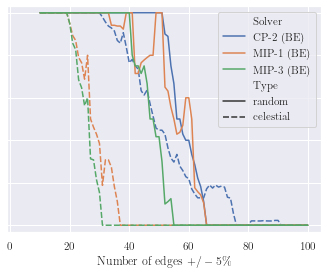

In [34]:
data = get_data("BE")
data = data[data["x"].apply(lambda x: 10<=x<= 100)]
plot(data, width=5, no_y_labels=True, filename="plot_exact_percent_local_min_sum_scaled")